# DoE | Análise de Resultados de Experimentos Fatoriais com Python

Nesta atividade, vamos analisar resultados de experimentos fatoriais. Iniciaremos por uma análise mais simples e manuale e avançaremos com o uso da ANOVA.

Vamos utilizar o dataset adaptado CAKE [cake.csv](https://drive.google.com/file/d/1rKsiVTj82Mtr_Mi_SPXwXFr71d32C3HV/view?usp=drive_link).

# Atividade 0 - Baixe e Importe o Dataset
Importe o arquivo como dataframe do Pandas

In [6]:
import pandas as pd

# Lendo o arquivo CSV
cake_df = pd.read_csv('cake.csv')

# Visualizando as primeiras linhas do dataframe
cake_df.head()

,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700
4,1,-1,3.775


# Atividade 1 (Opcional) - Plote os experimentos presentes na Tabela
Sugestão: utilize a ferramenta `PairGrid` do Seaborn

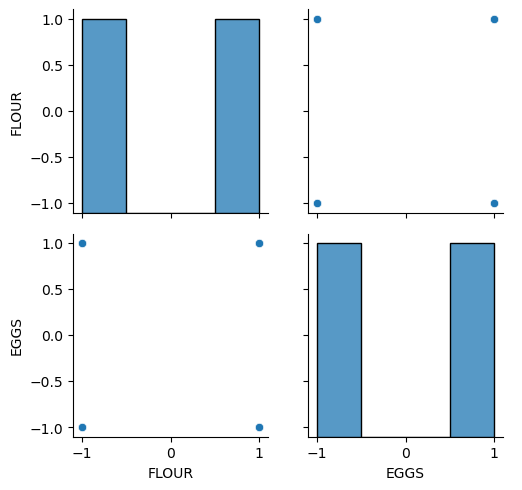

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# PairGrid
g = sns.PairGrid( cake_df[cake_df.columns[:-1]] )

g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

g.add_legend()

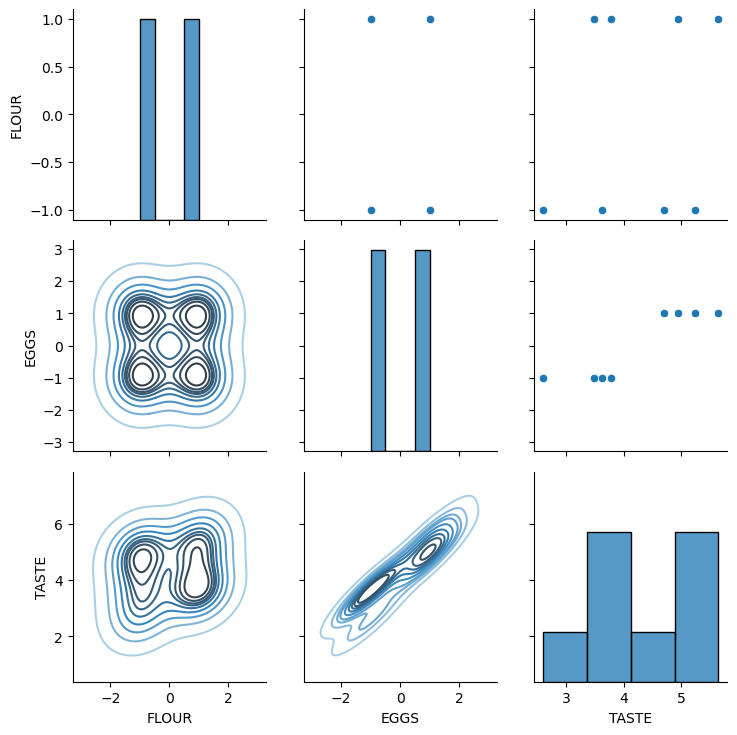

In [5]:
# Criando o PairGrid
g = sns.PairGrid(cake_df)

# Plotando gráficos de dispersão no upper triangle
g.map_upper(sns.scatterplot)

# Plotando gráficos de distribuição no diagonal
g.map_diag(sns.histplot)

# Plotando gráficos de densidade no lower triangle
g.map_lower(sns.kdeplot, cmap='Blues_d')

plt.show()

# Atividade 2 - Divida o dataframe e calcule os efeitos do primeiro fator

In [13]:
# Dividindo o dataframe com base nos níveis do fator 'FLOUR'
agrupado = cake_df.groupby('FLOUR')

# Calculando as médias de 'TASTE' para cada nível de 'FLOUR'
media_alto = agrupado.get_group(1)['TASTE'].mean()
media_baixo = agrupado.get_group(-1)['TASTE'].mean()

# Calculando o efeito do fator 'FLOUR'
efeito_farinha = abs(media_alto - media_baixo)

print(f"Efeito do fator FLOUR: {efeito_farinha:.3f}")

Efeito do fator FLOUR: 0.419


# Atividade 2 - Divida o dataframe e calcule os efeitos do segundo fator

In [14]:
# Dividindo o dataframe com base nos níveis do fator 'EGGS'
agrupado = cake_df.groupby('EGGS')

# Calculando as médias de 'TASTE' para cada nível de 'EGGS'
media_alto = agrupado.get_group(1)['TASTE'].mean()
media_baixo = agrupado.get_group(-1)['TASTE'].mean()

# Calculando o efeito do fator 'EGGS'
efeito_ovos = abs(media_alto - media_baixo)

print(f"Efeito do fator EGGS: {efeito_ovos:.3f}")

Efeito do fator EGGS: 1.769


# Atividade 3 - Calcule o Efeito combinado
Dica: Esse efeito é obtido a partir das Diagonais

In [16]:
# Calculando as médias para cada combinação de 'FLOUR' e 'EGGS'
media_11 = cake_df[(cake_df['FLOUR'] == 1) & (cake_df['EGGS'] == 1)]['TASTE'].mean()
media_minus1_minus1 = cake_df[(cake_df['FLOUR'] == -1) & (cake_df['EGGS'] == -1)]['TASTE'].mean()
media_1_minus1 = cake_df[(cake_df['FLOUR'] == 1) & (cake_df['EGGS'] == -1)]['TASTE'].mean()
media_minus1_1 = cake_df[(cake_df['FLOUR'] == -1) & (cake_df['EGGS'] == 1)]['TASTE'].mean()

# Calculando o efeito da interação
interacao = abs(((media_11 + media_minus1_minus1) / 2) - ((media_1_minus1 + media_minus1_1) / 2))

print(f"Efeito da interação entre Farinha e Ovos: {interacao:.3f}")

Efeito da interação entre Farinha e Ovos: 0.094


# Atividade 4 - Crie um Modelo de Efeitos Fixos e faça a Análise Estatística

**Análise Estatística do Modelo de Efeitos Fixos (Fixed Effects Model)**

O modelo de efeitos fixos assume que os níveis de cada fator são fixos e pré-determinados. Isso significa que o objetivo do experimento é avaliar o efeito dos diferentes níveis dos fatores, em vez de fazer inferências sobre uma população mais ampla.

A análise estatística do modelo de efeitos fixos envolve a construção de um modelo matemático que relaciona os níveis dos fatores com as variáveis de resposta. Normalmente, utiliza-se a regressão linear para estabelecer essa relação.

Atividade 4.1: Crie o Modelo
Sugestão: utilize o OLS (Ordinary Least Squares / Mínimos Quadrados Ordinários)

In [22]:
import statsmodels.api as sm

# Adicionando a coluna de interação ao dataframe
cake_df['FLOUR_x_EGGS'] = cake_df['FLOUR'] * cake_df['EGGS']

# Preparando os dados para regressão
X = cake_df[['FLOUR', 'EGGS', 'FLOUR_x_EGGS']]
X = sm.add_constant(X)  # Adiciona a constante para o intercepto
y = cake_df['TASTE']

# Criando o modelo usando OLS
modelo = sm.OLS(y, X)

# Ajustando o modelo
resultado = modelo.fit()

# Exibindo um resumo estatístico
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  TASTE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     9.139
Date:                Sun, 08 Oct 2023   Prob (F-statistic):             0.0291
Time:                        21:45:06   Log-Likelihood:                -2.8977
No. Observations:                   8   AIC:                             13.80
Df Residuals:                       4   BIC:                             14.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2531      0.174     24.472   

c:\Users\99769242\Anaconda3\envs\py39\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<span style="color:red">
1. **R-squared (R²)**: Este é o coeficiente de determinação. Ele indica a proporção da variação na variável dependente (TASTE) que é explicada pelo modelo. Seu valor é de 0,873, o que sugere que o modelo explica 87,3% da variabilidade em TASTE.

2. **Adj. R-squared**: É uma versão ajustada do R² que leva em consideração o número de preditores no modelo. É útil quando estamos comparando modelos com diferentes números de preditores. 

3. **F-statistic**: É uma estatística que compara a adequação do modelo em relação a um modelo sem preditores. O valor F é de 9,139, e o Prob (F-statistic) é de 0,0291. O valor p baixo sugere que o modelo é estatisticamente significativo em comparação com um modelo sem preditores.

4. **Coeficientes**:
   - **const**: é o intercepto do modelo.
   - **FLOUR, EGGS e FLOUR_x_EGGS**: são os coeficientes associados a cada preditor. Eles representam a mudança esperada na resposta (TASTE) para uma unidade de mudança no preditor, mantendo os outros preditores constantes.


5. **P>|t|**: Este é o valor-p associado ao teste t para cada coeficiente. Um valor-p baixo (geralmente < 0,05) sugere que o preditor é estatisticamente significativo.
   - `FLOUR` tem um valor-p de 0,295, o que sugere que não é estatisticamente significativo no modelo.
   - `EGGS` tem um valor-p de 0,007, o que indica que é estatisticamente significativo.
   - `FLOUR_x_EGGS` tem um valor-p de 0,801, o que sugere que a interação entre `FLOUR` e `EGGS` não é estatisticamente significativa.

6. **Durbin-Watson**: Esta é uma estatística que testa a autocorrelação dos erros. Um valor perto de 2 sugere que não há autocorrelação.

7. **Cond. No.**: É uma medida de multicolinearidade. Um valor próximo de 1 indica que não há multicolinearidade no modelo.

Em resumo, o modelo sugere que a variável `EGGS` tem um efeito significativo sobre `TASTE`, enquanto `FLOUR` e a interação entre `FLOUR` e `EGGS` não têm efeitos significativos. Ajustes adicionais e experimentação podem ser necessários para explorar essas relações mais profundamente e otimizar o sabor do bolo.

</span>

Atividade 4.2 - Faça a Análise Estatística do Modelo Utilizando ANOVA

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Definindo a fórmula para o modelo OLS
formula = 'TASTE ~ FLOUR + EGGS + FLOUR_x_EGGS'

# Criando o modelo usando a fórmula
modelo = ols(formula, data=cake_df).fit()

# Realizando a ANOVA
resultado_anova = anova_lm(modelo)

# Exibindo o resultado da ANOVA
print(resultado_anova)

               df    sum_sq   mean_sq          F    PR(>F)
FLOUR         1.0  0.350703  0.350703   1.451342  0.294716
EGGS          1.0  6.256953  6.256953  25.893631  0.007038
FLOUR_x_EGGS  1.0  0.017578  0.017578   0.072745  0.800724
Residual      4.0  0.966562  0.241641        NaN       NaN


<span style="color:red">
**Interpretação:**

- **FLOUR (Farinha):**
   - Valor-p: 0.294716. 
   - Isto sugere que "FLOUR" não tem um efeito estatisticamente significativo sobre "TASTE" ao nível de 0,05, pois o valor-p é superior a 0,05.

- **EGGS (Ovos):**
   - Valor-p: 0.007038.
   - Isto indica que "EGGS" tem um efeito significativo sobre "TASTE", pois o valor-p é menor que 0,05.

- **FLOUR_x_EGGS (Interação entre Farinha e Ovos):**
   - Valor-p: 0.800724.
   - A interação entre "FLOUR" e "EGGS" não é estatisticamente significativa, indicando que não há um efeito claro da combinação destes dois fatores sobre "TASTE".

- **Residual:**
   - A variação que não é explicada pelos fatores no modelo. 

Em resumo, com base nesta tabela ANOVA, a quantidade de ovos (EGGS) parece ter um efeito significativo sobre o sabor, enquanto a escolha da farinha e a interação entre a farinha e os ovos não têm efeitos significativos.
</span>

Atividade 4.3 - Faça o Teste T de Student e verifique quais Fatores tiveram efeitos estatisticamente relevantes

Instrução: considere um nível de confiança esperado como 95%


Sugestão: utilize a função `ppf` do `scipy`.

A função `ppf` calcula a **função de distribuição cumulativa inversa** e leva no mínimo 2 argumentos: ppf(q,df).
> Obs: Os outros argumentos são: loc (média) e escala (desvio padrão) - ambos opcionais (quando não declarados, o padrão é 0 e 1, respectivamente).

Por definição, um resultado de x para um determinado valor q e df significa P{T <= x} = q, ou seja, há probabilidade q de obter resultados menores ou iguais a x de uma distribuição T com o local e a escala fornecidos.


Considerando um nível de confiança de 95%, você deseja que 5% da probabilidade esteja nas extremidades da distribuição. Isso geralmente é feito simetricamente para que 2,5% esteja em cada cauda, portanto, você usaria valores q de 0,025 e 0,975 para os pontos de corte inferior e superior, respectivamente.

In [24]:
from scipy.stats import t

# Graus de liberdade: número de observações - número de coeficientes - 1
df = len(cake_df) - 3 - 1

# Obtenha os valores críticos para um nível de confiança de 95%
alpha = 0.025  # 2,5% em cada cauda
t_critico_inferior = t.ppf(alpha, df)
t_critico_superior = t.ppf(1 - alpha, df)

print(t_critico_inferior, t_critico_superior)

-2.7764451051977996 2.7764451051977987


<span style="color:red">
Os coeficientes e seus valores t são:

- **FLOUR (Farinha)**: t = 1.205
- **EGGS**: t = 5.089
- **FLOUR_x_EGGS**: t = -0.270

Compare esses valores t com o valor crítico:

Se o valor absoluto do t estatístico for maior que o valor crítico, o coeficiente é estatisticamente significativo ao nível de 5%.

**Interpretação:**

1. **FLOUR**: |1.205| < t_crítico. Portanto, "FLOUR" **não** é significativo ao nível de 95%.
2. **EGGS**: |5.089| > t_crítico. Assim, "EGGS" **é** significativo ao nível de 95%.
3. **FLOUR_x_EGGS**: |-0.270| < t_crítico. Portanto, a interação entre "FLOUR" e "EGGS" **não** é significativa ao nível de 95%.

Isso confirma que, entre os fatores fornecidos, apenas "EGGS" tem um efeito estatisticamente significativo sobre "TASTE" ao nível de 95% de confiança.
</span>